In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

sns.set(
    context='talk',
    style='whitegrid',
    palette='deep',
    font='sans-serif',
    rc={'figure.figsize': (10, 6), 'axes.grid': True},
)

In [70]:
df=pd.read_csv('/content/drive/MyDrive/Data Analysis Projects/Project 6/Covid-19 Dataset.csv')
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [71]:
df.shape

(321, 6)

In [72]:
df.tail()

,Date,State,Region,Confirmed,Deaths,Recovered
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181
320,4/29/2020,Zhejiang,Mainland China,1268,1,1263


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [74]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

,0
Date,datetime64[ns]
State,object
Region,object
Confirmed,int64
Deaths,int64
Recovered,int64


In [75]:
df.duplicated().sum()

0

In [76]:
df.describe()

,Date,Confirmed,Deaths,Recovered
count,321,321.000000,321.000000,321.000000
mean,2020-04-29 00:00:00,9949.800623,709.152648,3030.277259
min,2020-04-29 00:00:00,0.000000,0.000000,0.000000
25%,2020-04-29 00:00:00,104.000000,2.000000,2.000000
50%,2020-04-29 00:00:00,653.000000,12.000000,73.000000
75%,2020-04-29 00:00:00,4655.000000,144.000000,587.000000
max,2020-04-29 00:00:00,299691.000000,27682.000000,132929.000000
std,NaN,31923.853086,3236.162817,14364.870365


**Q. 1) Show the number of Confirmed, Deaths and Recovered cases in each Region.**

In [77]:
measures_by_region=df.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index().sort_values(by='Confirmed', ascending=False)
measures_by_region=measures_by_region.reset_index(drop=True)
measures_by_region

,Region,Confirmed,Deaths,Recovered
0,US,1039909,60967,120720
1,Spain,236899,24275,132929
2,Italy,203591,27682,71252
3,France,166543,24121,49118
4,UK,166441,26166,857
...,...,...,...,...
182,Sao Tome and Principe,8,0,4
183,Papua New Guinea,8,0,0
184,Bhutan,7,0,5
185,Western Sahara,6,0,5


In [78]:
confirmed_by_region=measures_by_region.head(10).copy()
deaths_by_region=measures_by_region.sort_values(by='Deaths', ascending=False).head(10)
recovered_by_region=measures_by_region.sort_values(by='Recovered', ascending=False).head(10)

In [79]:
list(df.Date.unique())

[Timestamp('2020-04-29 00:00:00')]

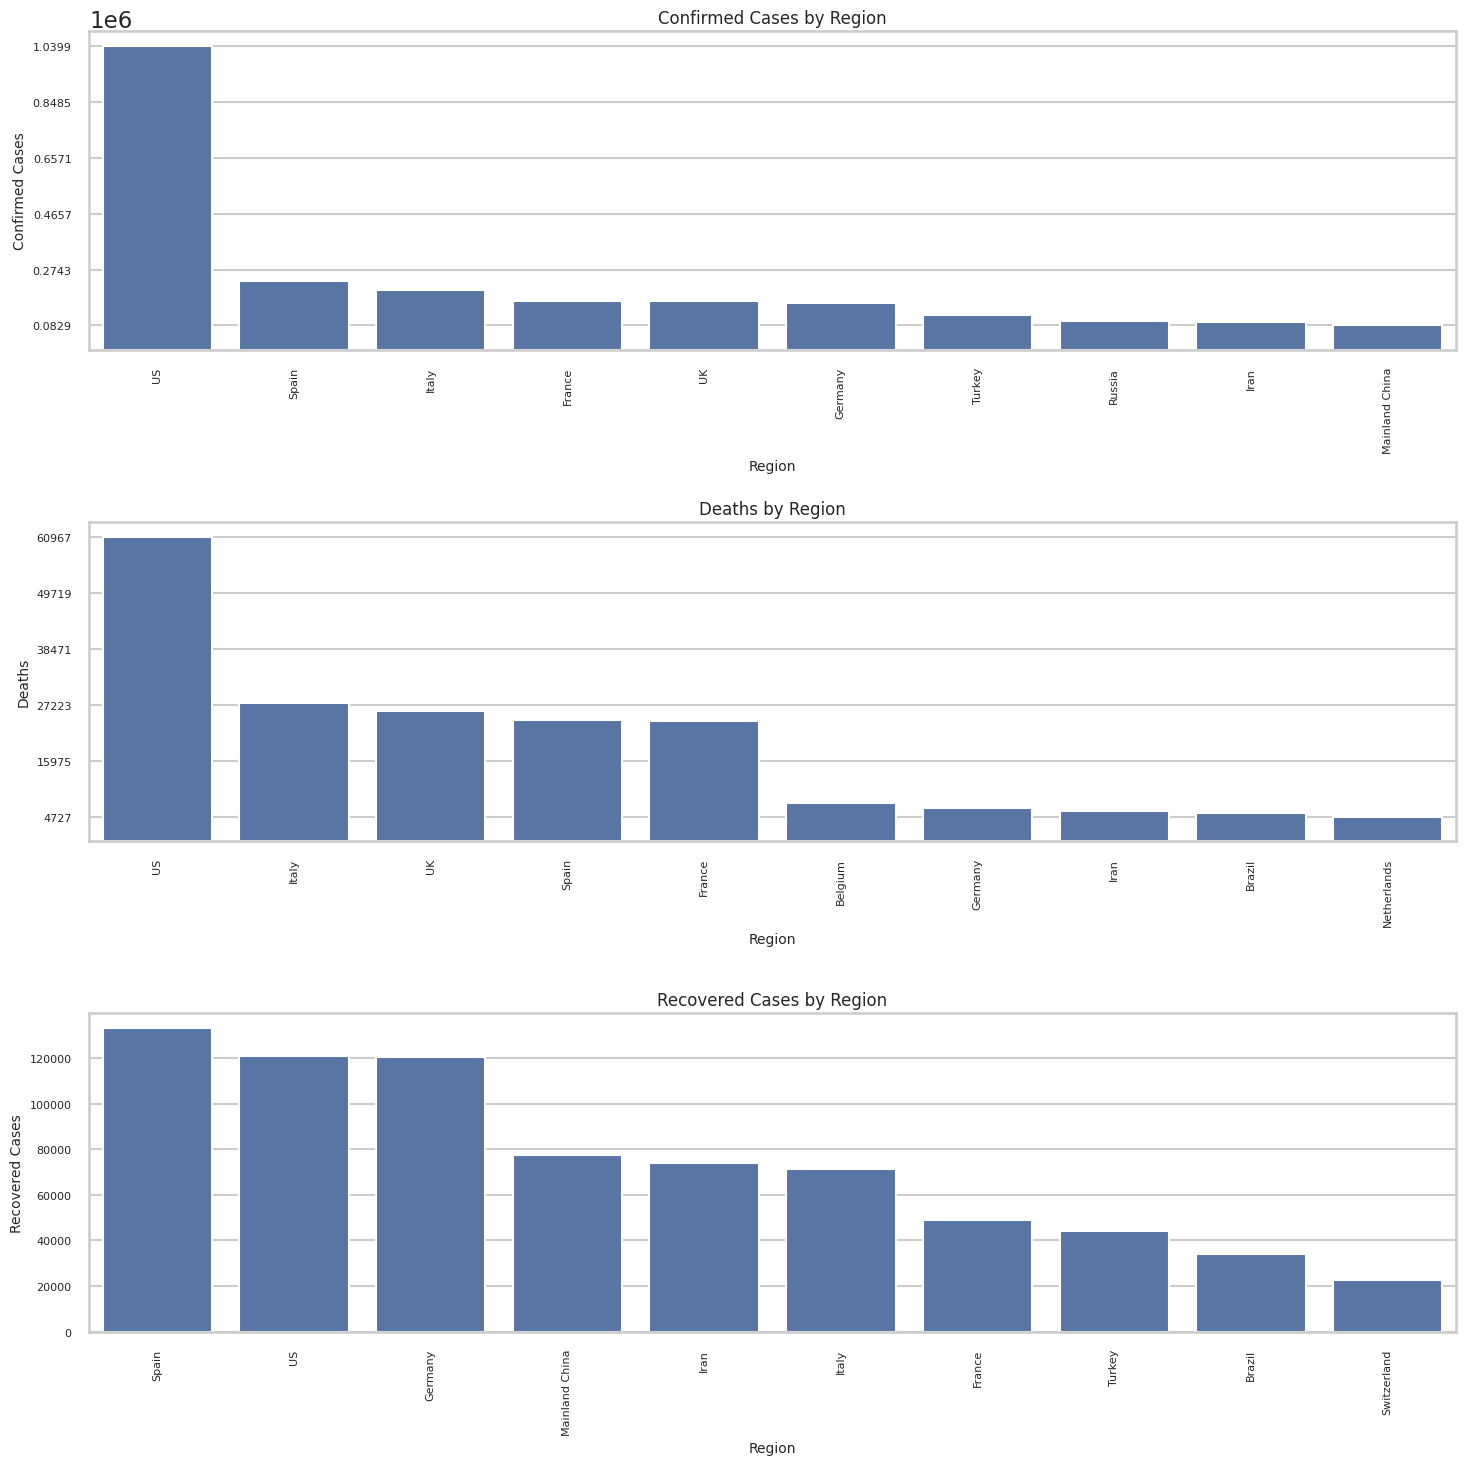

In [93]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))  # Adjusted height

# Bar plot for confirmed cases
sns.barplot(data=confirmed_by_region, x='Region', y='Confirmed', ax=ax[0])
ax[0].set_title('Confirmed Cases by Region', fontsize=12)  # Reduced font size
ax[0].set_xlabel('Region', fontsize=10)  # Reduced font size
ax[0].set_ylabel('Confirmed Cases', fontsize=10)  # Reduced font size
ax[0].tick_params(axis='x', rotation=90, labelsize=8)  # Adjusted x-tick label size
ax[0].tick_params(axis='y', labelsize=8)  # Adjusted y-tick label size

# Set y-ticks for confirmed cases
min_confirmed = confirmed_by_region['Confirmed'].min()
max_confirmed = confirmed_by_region['Confirmed'].max()
ax[0].set_yticks(range(min_confirmed, max_confirmed + 1, (max_confirmed - min_confirmed) // 5))

# Bar plot for deaths
sns.barplot(data=deaths_by_region, x='Region', y='Deaths', ax=ax[1])
ax[1].set_title('Deaths by Region', fontsize=12)  # Reduced font size
ax[1].set_xlabel('Region', fontsize=10)  # Reduced font size
ax[1].set_ylabel('Deaths', fontsize=10)  # Reduced font size
ax[1].tick_params(axis='x', rotation=90, labelsize=8)  # Adjusted x-tick label size
ax[1].tick_params(axis='y', labelsize=8)  # Adjusted y-tick label size

# Set y-ticks for deaths
min_deaths = deaths_by_region['Deaths'].min()
max_deaths = deaths_by_region['Deaths'].max()
ax[1].set_yticks(range(min_deaths, max_deaths + 1, (max_deaths - min_deaths) // 5))

# Bar plot for recovered cases
sns.barplot(data=recovered_by_region, x='Region', y='Recovered', ax=ax[2])
ax[2].set_title('Recovered Cases by Region', fontsize=12)  # Reduced font size
ax[2].set_xlabel('Region', fontsize=10)  # Reduced font size
ax[2].set_ylabel('Recovered Cases', fontsize=10)  # Reduced font size
ax[2].tick_params(axis='x', rotation=90, labelsize=8)  # Adjusted x-tick label size
ax[2].tick_params(axis='y', labelsize=8)  # Adjusted y-tick label size

# Remove suptitle and adjust layout
plt.tight_layout()
plt.show()

**Q. 2) Remove all the records where the Confirmed Cases is Less Than 10.**

In [94]:
df=df[df['Confirmed'] >= 10]
df.shape

(304, 6)

**Q. 3) In which Region, maximum number of Confirmed cases were recorded ?**

In [95]:
max_confirmed_region=df[df['Confirmed'] == df['Confirmed'].max()]['Region'].reset_index()
max_confirmed_region['Region'][0]

'US'

**Q. 4) In which Region, minimum number of Deaths cases were recorded ?**

In [96]:
min_death_region=df[df['Deaths'] == df['Deaths'].min()]['Region'].reset_index()
min_death_region['Region'][0]

'Cambodia'

**Q. 5) How many Confirmed, Deaths & Recovered cases were reported from Bangladesh till 29 April 2020 ?t**

In [97]:
df[df['Region'] == 'Bangladesh'][['Confirmed', 'Deaths', 'Recovered']]

,Confirmed,Deaths,Recovered
12,7103,163,150


**Q. 6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.**

In [98]:
df_confirmed_sorted=df.sort_values(by='Confirmed')
df_confirmed_sorted

,Date,State,Region,Confirmed,Deaths,Recovered
156,2020-04-29,NaN,Suriname,10,1,8
70,2020-04-29,NaN,Holy See,10,0,2
59,2020-04-29,NaN,Gambia,10,1,8
318,2020-04-29,Yukon,Canada,11,0,0
217,2020-04-29,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,2020-04-29,NaN,France,165093,24087,48228
168,2020-04-29,NaN,UK,165221,26097,0
80,2020-04-29,NaN,Italy,203591,27682,71252
153,2020-04-29,NaN,Spain,236899,24275,132929


**Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.**

In [99]:
df_recovered_sorted=df.sort_values(by='Deaths')
df_recovered_sorted

,Date,State,Region,Confirmed,Deaths,Recovered
55,2020-04-29,NaN,Fiji,18,0,12
207,2020-04-29,Faroe Islands,Denmark,187,0,181
206,2020-04-29,Falkland Islands (Malvinas),UK,13,0,11
204,2020-04-29,Diamond Princess cruise ship,US,49,0,0
45,2020-04-29,NaN,Dominica,16,0,13
...,...,...,...,...,...,...
265,2020-04-29,New York,US,299691,23477,0
57,2020-04-29,NaN,France,165093,24087,48228
153,2020-04-29,NaN,Spain,236899,24275,132929
168,2020-04-29,NaN,UK,165221,26097,0


**Extra**

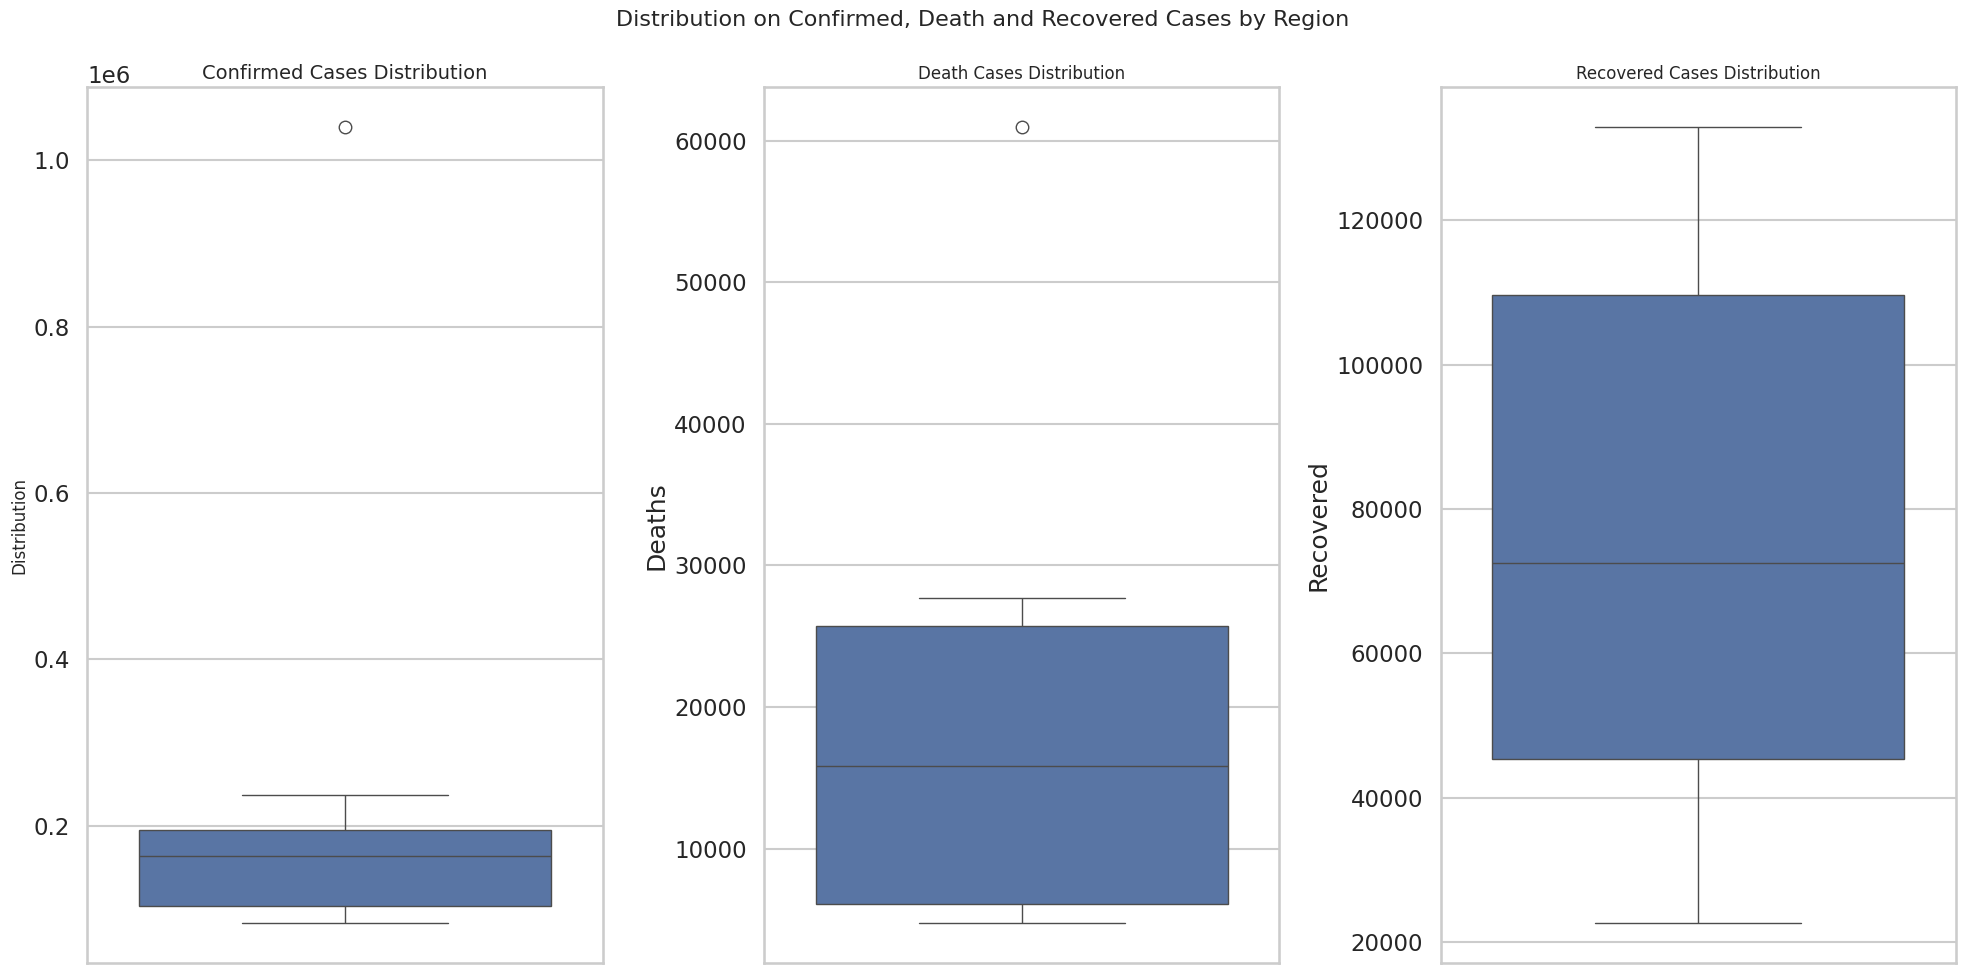

In [107]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10), sharey=False)

sns.boxplot(data=confirmed_by_region, y='Confirmed', ax=ax[0])
ax[0].set_title("Confirmed Cases Distribution", fontsize=14)
ax[0].set_ylabel('Distribution', fontsize=12)

sns.boxplot(data=deaths_by_region, y='Deaths', ax=ax[1])
ax[1].set_title("Death Cases Distribution", fontsize=12)

sns.boxplot(data=recovered_by_region, y='Recovered', ax=ax[2])
ax[2].set_title("Recovered Cases Distribution", fontsize=12)

fig.suptitle("Distribution on Confirmed, Death and Recovered Cases by Region", fontsize=16)
plt.tight_layout()
plt.show()

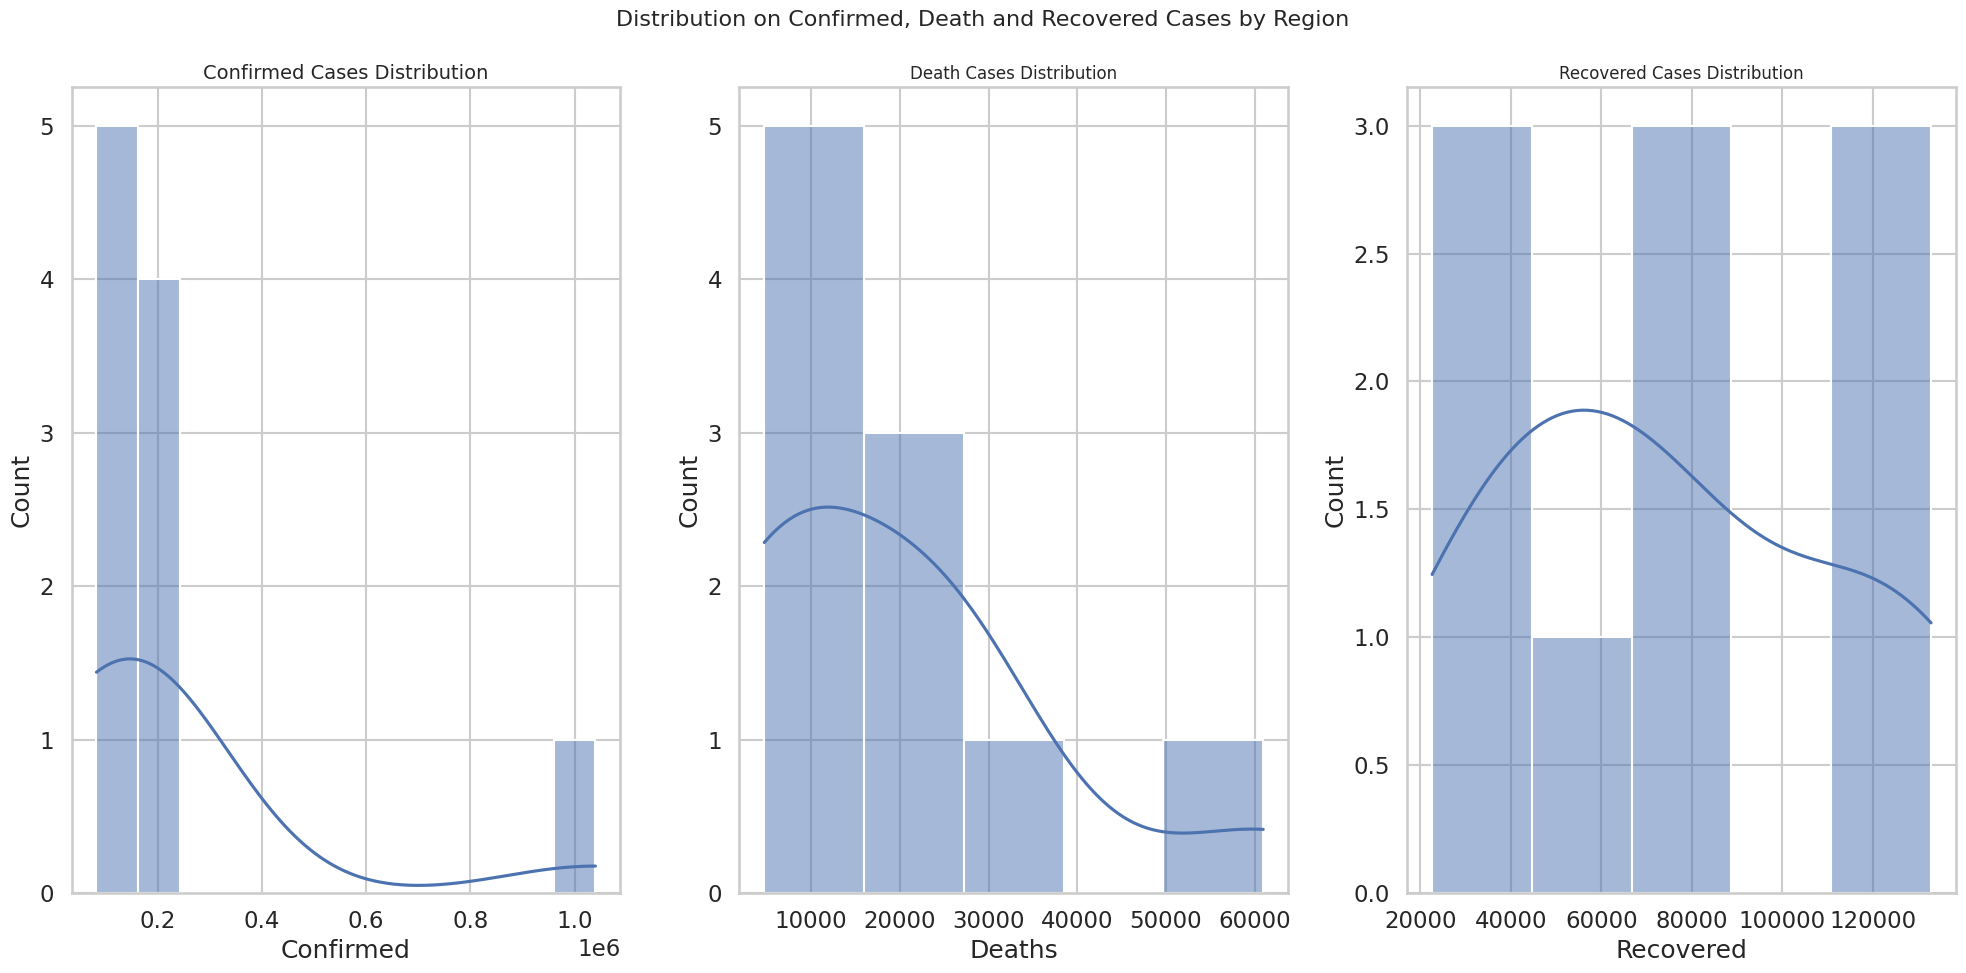

In [110]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10), sharey=False)

sns.histplot(data=confirmed_by_region, x='Confirmed', kde=True, ax=ax[0])
ax[0].set_title("Confirmed Cases Distribution", fontsize=14)

sns.histplot(data=deaths_by_region, x='Deaths', kde=True, ax=ax[1])
ax[1].set_title("Death Cases Distribution", fontsize=12)

sns.histplot(data=recovered_by_region, x='Recovered', kde=True, ax=ax[2])
ax[2].set_title("Recovered Cases Distribution", fontsize=12)

fig.suptitle("Distribution on Confirmed, Death and Recovered Cases by Region", fontsize=16)
plt.tight_layout()
plt.show()